## 1. Exploration of president's dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re

In [2]:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else:
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs

In [3]:
fname = "./drive/MyDrive/Colab_Projects/RITAL/datasets/AFDpresidentutf8/corpus.tache1.learn.utf8.txt"
pres_alltxts, pres_alllabs = load_pres(fname)

In [4]:
# look at class balance
pres_labels, pres_counts = np.unique(pres_alllabs, return_counts=True)
print(dict(zip(pres_labels, pres_counts)))

{np.int64(-1): np.int64(7523), np.int64(1): np.int64(49890)}


In [5]:
# check for duplicate texts
from collections import defaultdict

duplicates = defaultdict(list)

for index, text in enumerate(pres_alltxts):
    duplicates[text].append(index)

duplicate_positions = {k: v for k, v in duplicates.items() if len(v) > 1}
print(duplicate_positions)

{' Nos destins sont liés.\n': [309, 48223], ' Monsieur le Président de la République, \n': [317, 343, 360, 401, 32828], ' Mesdames, Messieurs, \n': [456, 621, 1581, 2080, 3837, 5992, 7349, 7794, 11513, 12345, 14606, 16526, 17645, 20643, 20797, 21075, 23782, 24929, 26002, 26678, 26796, 28231, 28988, 29337, 29691, 29991, 30662, 30829, 33282, 34078, 34481, 35481, 35905, 35923, 36209, 38934, 39333, 39486, 39539, 41486, 42203, 42761, 43459, 44968, 45489, 46408, 48231, 49216, 49270, 51496, 51568, 51938, 52735, 53353, 56172, 56811], " Ce partenariat doit aussi porter sur l'organisation du monde de demain.\n": [764, 36007], " La France considère que cette évolution du monde est la seule réponse possible à la disparition de l'ordre bipolaire.\n": [770, 36016], ' Elle seule peut fonder durablement un nouvel équilibre qui soit juste et accepté par tous.\n': [771, 36017], ' Monsieur le Président, Mesdames et Messieurs, je vous remercie.\n': [847, 28435, 56659], ' Les temps ont heureusement changé.

In [6]:
print(pres_alltxts[309])
print(pres_alltxts[48223])

 Nos destins sont liés.

 Nos destins sont liés.



In [7]:
# check for missing values
empty_positions = [index for index, text in enumerate(pres_alltxts) if (text == "" or text is None)]
print(empty_positions)

[]


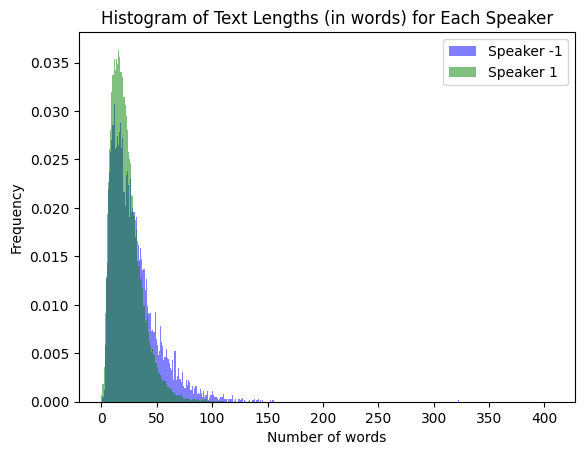

In [8]:
# plot histograms of sentence word length per president on the same plot

def count_words(text):
    words = re.findall(r'\b\w+\b|<\w+>', text)
    return len(words)

speaker_word_counts = {-1: [], 1: []}

for text, speaker in zip(pres_alltxts, pres_alllabs):
    word_count = count_words(text)
    speaker_word_counts[speaker].append(word_count)

# Plot the histograms
plt.hist(speaker_word_counts[-1], bins=np.arange(min(speaker_word_counts[-1]), max(speaker_word_counts[-1]) + 1, 1), alpha=0.5, label='Speaker -1', color='blue', density=True)
plt.hist(speaker_word_counts[1], bins=np.arange(min(speaker_word_counts[1]), max(speaker_word_counts[1]) + 1, 1), alpha=0.5, label='Speaker 1', color='green', density=True)

# Add labels and title
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths (in words) for Each Speaker')
plt.legend()

# Show the plot
plt.savefig("drive/MyDrive/Colab_Projects/RITAL/plots/sentence_length_dist.png")
plt.show()

In [9]:
# find vocabulary size per president and in total
vocab = {-1: set(), 1: set()}

for text, speaker in zip(pres_alltxts, pres_alllabs):
    words = re.findall(r'\b\w+\b|<\w+>', text)
    for word in words:
      vocab[speaker].add(word)

print("Vocabulary of speaker -1: ", len(vocab[-1]))
print("Vocabulary of speaker 1: ", len(vocab[1]))
print("Total vocabulary: ", len(vocab[-1].union(vocab[1])))

Vocabulary of speaker -1:  14502
Vocabulary of speaker 1:  27907
Total vocabulary:  31280


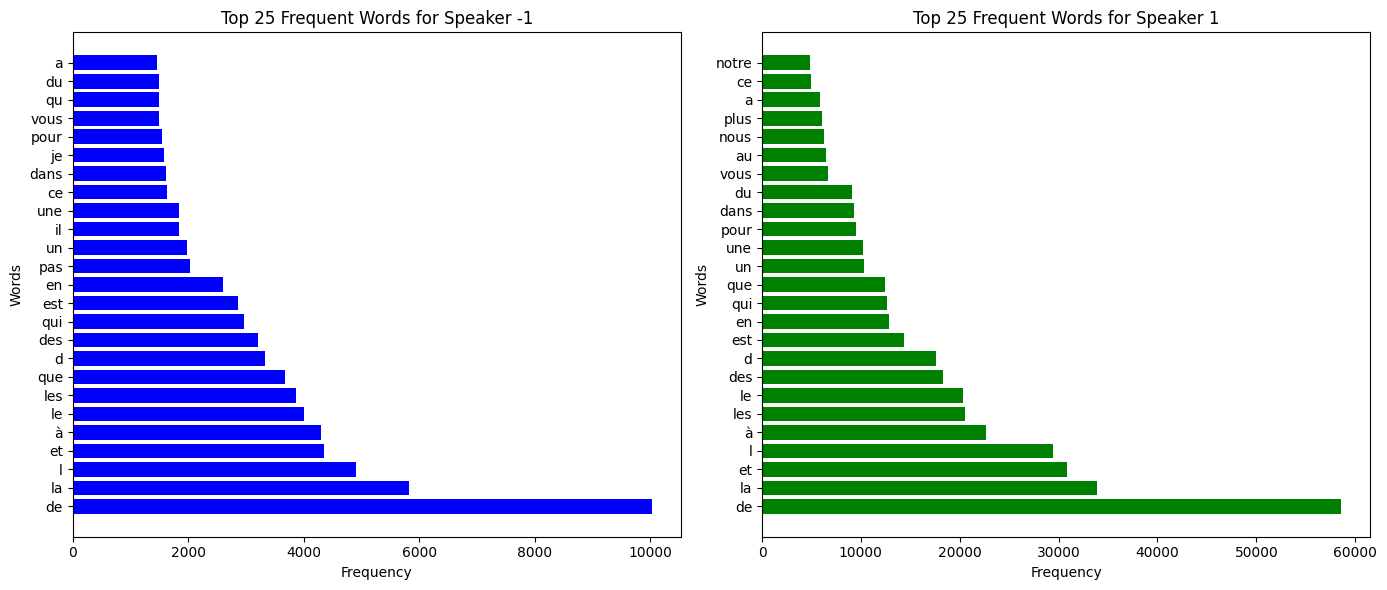

In [10]:
# plot 25 most common words (including stop-words) per president
from collections import Counter

word_list = {-1: [], 1: []}

for text, speaker in zip(pres_alltxts, pres_alllabs):
    words = re.findall(r'\b\w+\b|<\w+>', text)
    word_list[speaker].extend(words)

def get_top_n_frequent_words(word_list, n=25):
    word_counts = Counter(word_list)
    return word_counts.most_common(n)

top_words_speaker_0 = get_top_n_frequent_words(word_list[-1])
top_words_speaker_1 = get_top_n_frequent_words(word_list[1])

words_0, counts_0 = zip(*top_words_speaker_0)
words_1, counts_1 = zip(*top_words_speaker_1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(words_0, counts_0, color='blue')
axes[0].set_title('Top 25 Frequent Words for Speaker -1')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

axes[1].barh(words_1, counts_1, color='green')
axes[1].set_title('Top 25 Frequent Words for Speaker 1')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

plt.tight_layout()
plt.savefig("drive/MyDrive/Colab_Projects/RITAL/plots/most_frequent_words_before.png")
plt.show()

Conclusions:
1. Distributions of text lengths follow same laws, but could be added as a feature.
2. Vocabulary of speaker 1 is almost double of speaker -1, but this could just be due to the class imbalance.
3. Most frequent words is not relevant at this stage, we need to do some pre-processing first.

## 2. Pre-processing of presidents dataset

One assumption we make is that the texts are correctly spelled. This would mean that lemmatizing should produce quite good results.

This is reasonable given the nature of the dataset (i.e. although we don't know its provenience, it looks well annotated, so hopefully it is also well transcribed).

In [11]:
# let's confirm whether the corpus is indeed well-spelled
! pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 20.5 MB/s eta 0:00:00


In [12]:
import string
import nltk
nltk.download("punkt_tab")
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize

spell = SpellChecker(language="fr")

# represent each text in corpus as a list of words
for text in pres_alltxts:
  words = re.sub(r"<[^<>]+>", " ", text)
  words = re.sub(rf"[{string.punctuation}]", " ", words)
  words = word_tokenize(words, language="french")

  wrong = spell.unknown(words)
  if len(wrong) > 0:
    print(wrong)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Streaming output truncated to the last 5000 lines.
{'reich'}
{'stalingrad'}
{'s', 'varsovie'}
{'gestapo'}
{'gaulle'}
{'assuréeà', 'd', 'grondante'}
{'gaulle', 'd'}
{'d'}
{'gaulle'}
{'d'}
{'calédonie'}
{'gaulle', 'aujourd'}
{'j'}
{'j'}
{'n'}
{'d', 'n'}
{'etat', 'd', 'aujourd'}
{'lassay', 'd'}
{'m', '60e'}
{'m', 'c'}
{'d', 'm', 's', 'n', 'lorsqu'}
{'londres', 'f', 'grenoble'}
{'gestapo', 'aix'}
{'grenoble', 'd'}
{'usinor', 'sacilor'}
{'d'}
{'f', 'd'}
{'m', 'd'}
{'sorbonne', 'etudiante'}
{'gallia'}
{'gestapo', 'clichy'}
{'oise', 'seine', 'pc'}
{'renault'}
{'adir', 'd'}
{'d'}
{'m'}
{'jusqu', 'amicol'}
{'vercors'}
{'rhône', 'd'}
{'m', 'd'}
{'m', 'lorsqu', 's'}
{'s', 'pommiès'}
{'d'}
{'yaoundé', 'ayos', 'd'}
{'pyrénées', 's', 'artix'}
{'s'}
{'d', 'artix'}
{'d', 'jusqu', 'arthez', 'etat', 'béarn', 'pyrénées', 'lorsqu'}
{'d'}
{'m', 'lorsqu', 'dijon'}
{'sncf'}
{'argentière', 'gestapo', 'grenoble'}
{'s'}
{'1ère', 'dijon'}
{'m', 's'}
{'parly', 'ile', 'vélizy', 'ii', 'villacoublay'}
{'2e', 'elu', 

Seems fine. The spellchecker recognizes all fragmented shortened words that have been fragmented and so lose meaning. Some accents seem to be ill-used, but this should be fixable by removing them in our pre-processing.

In [13]:
import nltk
import string
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r"<[^<>]+>", " ", text)
    text = re.sub(rf"[{string.punctuation}]", " ", text)

    tokens = word_tokenize(text, language="french")

    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
              processed_tokens.append(lemmatizer.lemmatize(token))

    # remove accents after removing stop-words, since stop-words can contain accents
    processed_tokens = [unicodedata.normalize('NFKD', token).encode('ASCII', 'ignore').decode('utf-8') for token in processed_tokens]

    return processed_tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
pres_tokenized = []

print(pres_alltxts[:5])
for text in pres_alltxts:
  pres_tokenized.append(preprocess_text(text))
print(pres_tokenized[:5])

[" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n", " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n", " C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.\n", ' Aucun citoyen français ne peut être indifférent à un séjour à Brazzaville.\n', ' Le Congo, que naguère le <nom> qualifia de "refuge pour la liberté", de "base de départ pour la libération", de "môle pour la Résistance", comment ne pas être heureux de s\'y retrouver ?\n']
[['quand', 'dis', 'chers', 'amis', 'agit', 'la', 'formule', 'diplomatique', 'expression', 'ressens'], ['abord', 'merci', 'cet', 'exceptionnel', 'accueil', 'congolais', 'brazavi

In [15]:
print("ne" in stop_words)
print("pas" in stop_words)

True
True


We see that negation is part of the stop-words. This is probably not relevant for this dataset, but could be important for the movies dataset.

We also see that concepts are sometimes referred to in quotes. By tokenizing we are effectlively removing the ability to recognize them.

Adverbs are also kept by our chosen set of stop-words. Let's look again at the most frequent words used for each speaker to see if this is relevant.

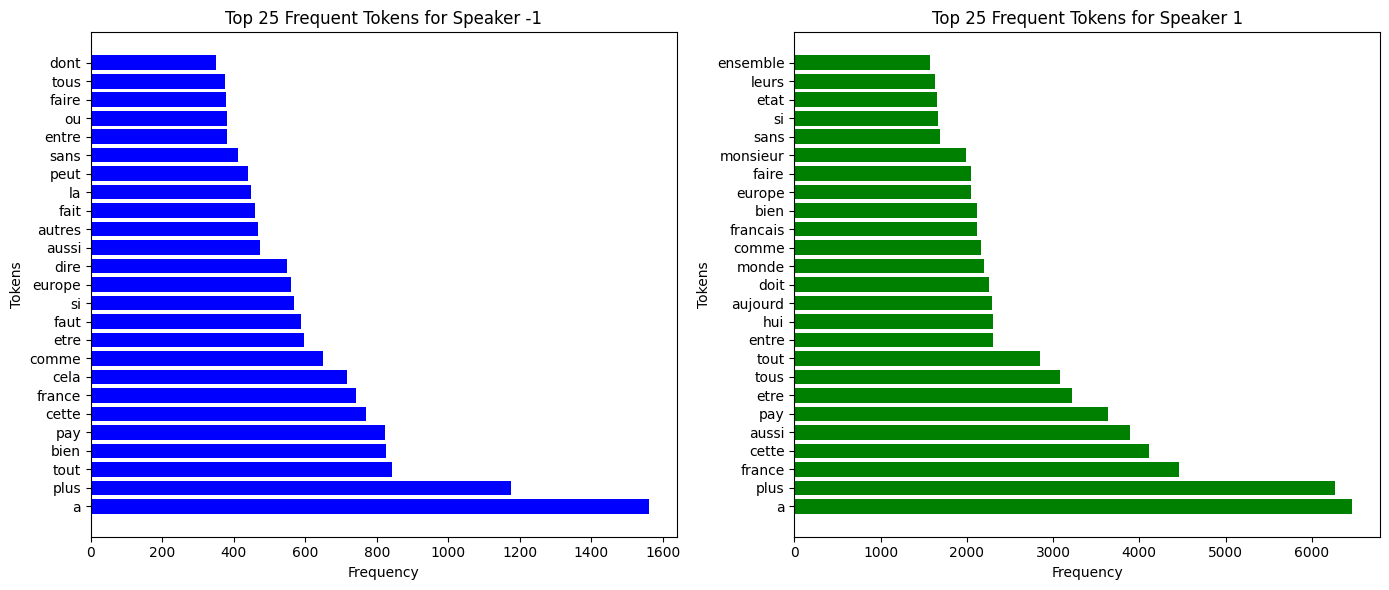

In [16]:
def vis_frequent(texts, labels, index):
  token_list = {-1: [], 1: []}

  for text, speaker in zip(texts, labels):
    token_list[speaker].extend(text)

  def get_top_n_frequent_tokens(token_list, n=25):
      token_counts = Counter(token_list)
      return token_counts.most_common(n)

  top_tokens_speaker_0 = get_top_n_frequent_tokens(token_list[-1])
  top_tokens_speaker_1 = get_top_n_frequent_tokens(token_list[1])

  tokens_0, counts_0 = zip(*top_tokens_speaker_0)
  tokens_1, counts_1 = zip(*top_tokens_speaker_1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  axes[0].barh(tokens_0, counts_0, color='blue')
  axes[0].set_title('Top 25 Frequent Tokens for Speaker -1')
  axes[0].set_xlabel('Frequency')
  axes[0].set_ylabel('Tokens')

  axes[1].barh(tokens_1, counts_1, color='green')
  axes[1].set_title('Top 25 Frequent Tokens for Speaker 1')
  axes[1].set_xlabel('Frequency')
  axes[1].set_ylabel('Tokens')

  plt.tight_layout()
  plt.savefig(f"drive/MyDrive/Colab_Projects/RITAL/plots/most_frequent_tokens_after{index}.png")
  plt.show()

vis_frequent(pres_tokenized, pres_alllabs, 1)

Coming back from a later step, we saw our vocabulary is still quite large, which is not appropriate for BoW-derived encodings. Let's remove frequent and rare words, then look again at the vocabulary sizes and the distributions per speaker.

In [17]:
def filter_frequent_rare_tokens(texts, min_freq=2, max_percent=0.8):
  token_counts = Counter(token for text in texts for token in text)

  num_docs = len(texts)

  max_freq = max_percent * num_docs
  min_freq = min_freq

  filtered_texts = []
  for text in texts:
    filtered_text = []
    filtered_text += [token for token in text if min_freq <= token_counts[token] <= max_freq]
    filtered_texts.append(filtered_text)

  return filtered_texts

In [18]:
# filter for lower than 1% to have any effect on the vocabulary
# minimum frequency has a larger impact

pres_filtered = filter_frequent_rare_tokens(pres_tokenized, min_freq=2, max_percent=0.01)
print(pres_tokenized[0])
print(pres_filtered[0])

['quand', 'dis', 'chers', 'amis', 'agit', 'la', 'formule', 'diplomatique', 'expression', 'ressens']
['dis', 'chers', 'amis', 'agit', 'formule', 'diplomatique', 'expression', 'ressens']


In [19]:
vocab = {-1: set(), 1: set()}

for text, speaker in zip(pres_filtered, pres_alllabs):
    for token in text:
      vocab[speaker].add(token)

print("Vocabulary of speaker -1: ", len(vocab[-1]))
print("Vocabulary of speaker 1: ", len(vocab[1]))
print("Total vocabulary: ", len(vocab[-1].union(vocab[1])))

Vocabulary of speaker -1:  10255
Vocabulary of speaker 1:  16235
Total vocabulary:  16711


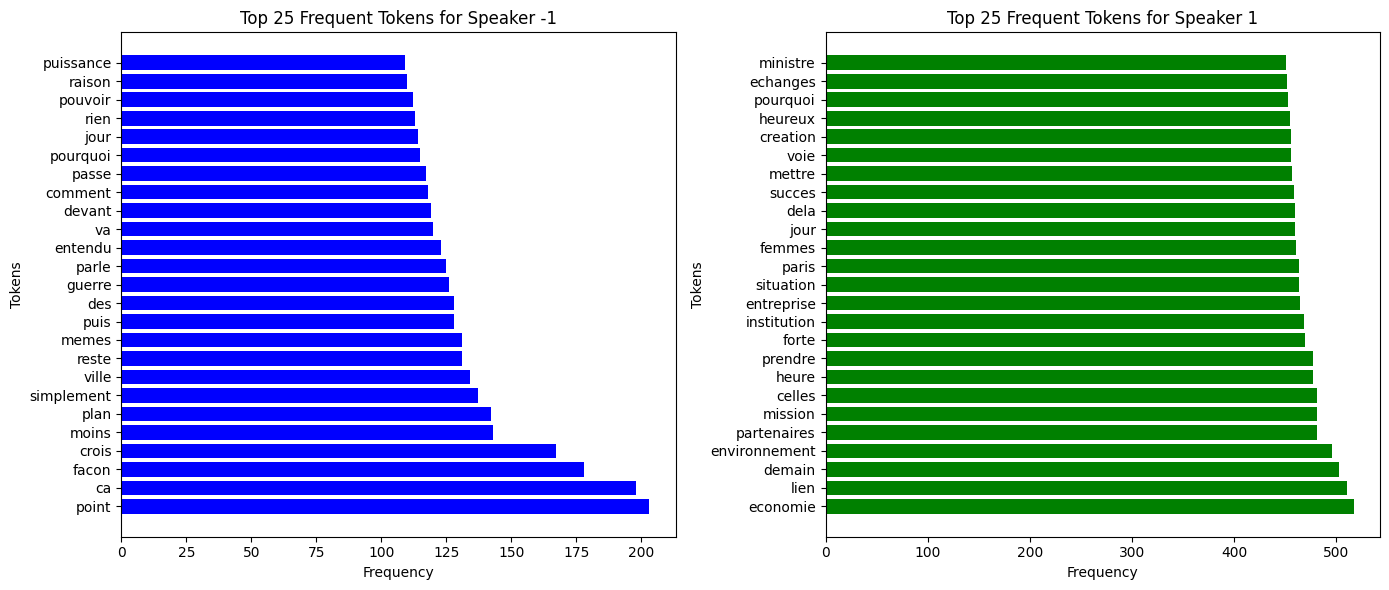

In [20]:
vis_frequent(pres_filtered, pres_alllabs, 2)

## 3. Constructing encodings (BoW, Tf-Idf, presence coding) from our tokenization

Here, we need to remark that if we construct the tf-idf encoding on the whole corpus we are essentially introducing data leaking.

This means we should create a train-test split at this stage, encode and validate on this, then for the submission encode on the whole corpus.

For validation, sklearn provides two methods we will use:
- ```fit_transform``` for learning the vocabulary and encoding the training set
- ```transform``` for encoding the testing set

In [21]:
pres_corpus = [" ".join(tokens) for tokens in pres_filtered]
print(pres_corpus[0])

dis chers amis agit formule diplomatique expression ressens


In [22]:
# create the train-test split randomly
# we will see later that for fine-tuning BERT we preferred to introduce some structure into the split

# keep the imbalance in the dataset for validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pres_corpus, pres_alllabs, test_size=0.2, stratify=pres_alllabs, random_state=42)

In [23]:
# check class balance after split
train_y_label, train_y_count = np.unique(y_train, return_counts=True)
test_y_label, test_y_count = np.unique(y_test, return_counts=True)

print("Ratio train: ", train_y_count[0] / train_y_count[1])
print("Ratio test: ", test_y_count[0] / test_y_count[1])

Ratio train:  0.15078171978352375
Ratio test:  0.15083183002605732


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer(binary=False)
tfidf_vectorizer = TfidfVectorizer()
presence_vectorizer = CountVectorizer(binary=True)

bow_x_train = bow_vectorizer.fit_transform(x_train)
tfidf_x_train = tfidf_vectorizer.fit_transform(x_train)
presence_x_train = presence_vectorizer.fit_transform(x_train)

bow_x_test = bow_vectorizer.transform(x_test)
tfidf_x_test = tfidf_vectorizer.transform(x_test)
presence_x_test = presence_vectorizer.transform(x_test)

In [25]:
print(bow_x_train.shape, bow_x_train[0])
print(tfidf_x_train.shape, tfidf_x_train[0])
print(presence_x_train.shape, presence_x_train[0])

(45930, 16507) <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 16507)>
  Coords	Values
  (0, 10715)	1
  (0, 281)	1
  (0, 11911)	1
(45930, 16507) <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 16507)>
  Coords	Values
  (0, 10715)	0.5323880704449829
  (0, 281)	0.7328585016074264
  (0, 11911)	0.4236524035923623
(45930, 16507) <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 16507)>
  Coords	Values
  (0, 10715)	1
  (0, 281)	1
  (0, 11911)	1


## 4. Validation of some simple models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# IDEA 1: don't do anything about the class imbalance, but evaluate appropriately

# Logistic classifiers
bi_logreg = LogisticRegression()
bi_logreg.fit(bow_x_train, y_train)
bi_y_pred_logreg = bi_logreg.predict(bow_x_test)
print("Logistic regression on BoW")
print(classification_report(y_test, bi_y_pred_logreg))
print()

ti_logreg = LogisticRegression()
ti_logreg.fit(tfidf_x_train, y_train)
ti_y_pred_logreg = ti_logreg.predict(tfidf_x_test)
print("Logistic regression on Tf-Idf")
print(classification_report(y_test, ti_y_pred_logreg))
print()

pi_logreg = LogisticRegression()
pi_logreg.fit(presence_x_train, y_train)
pi_y_pred_logreg = pi_logreg.predict(presence_x_test)
print("Logistic regression on binary BoW")
print(classification_report(y_test, pi_y_pred_logreg))
print()

# Naive Bayes classifiers
bi_nb = MultinomialNB()
bi_nb.fit(bow_x_train, y_train)
bi_y_pred_nb = bi_nb.predict(bow_x_test)
print("Naive Bayes on BoW")
print(classification_report(y_test, bi_y_pred_nb))
print()

ti_nb = MultinomialNB()
ti_nb.fit(tfidf_x_train, y_train)
ti_y_pred_nb = ti_nb.predict(tfidf_x_test)
print("Naive Bayes on Tf-Idf")
print(classification_report(y_test, ti_y_pred_nb))
print()

pi_nb = MultinomialNB()
pi_nb.fit(presence_x_train, y_train)
pi_y_pred_nb = pi_nb.predict(presence_x_test)
print("Naive Bayes on binary BoW")
print(classification_report(y_test, pi_y_pred_nb))
print()

# SVM classifiers
bi_svm = LinearSVC()
bi_svm.fit(bow_x_train, y_train)
bi_y_pred_svm = bi_svm.predict(bow_x_test)
print("SVM on BoW")
print(classification_report(y_test, bi_y_pred_svm))
print()

ti_svm = LinearSVC()
ti_svm.fit(tfidf_x_train, y_train)
ti_y_pred_svm = ti_svm.predict(tfidf_x_test)
print("SVM on Tf-Idf")
print(classification_report(y_test, ti_y_pred_svm))
print()

pi_svm = LinearSVC()
pi_svm.fit(presence_x_train, y_train)
pi_y_pred_svm = pi_svm.predict(presence_x_test)
print("SVM on binary BoW")
print(classification_report(y_test, pi_y_pred_svm))
print()

Logistic regression on BoW
              precision    recall  f1-score   support

          -1       0.70      0.32      0.44      1505
           1       0.91      0.98      0.94      9978

    accuracy                           0.89     11483
   macro avg       0.80      0.65      0.69     11483
weighted avg       0.88      0.89      0.88     11483


Logistic regression on Tf-Idf
              precision    recall  f1-score   support

          -1       0.80      0.14      0.24      1505
           1       0.89      0.99      0.94      9978

    accuracy                           0.88     11483
   macro avg       0.84      0.57      0.59     11483
weighted avg       0.87      0.88      0.85     11483


Logistic regression on binary BoW
              precision    recall  f1-score   support

          -1       0.70      0.32      0.44      1505
           1       0.90      0.98      0.94      9978

    accuracy                           0.89     11483
   macro avg       0.80      0.65  

In [28]:
print(type(bow_x_train), type(y_train))

<class 'scipy.sparse._csr.csr_matrix'> <class 'list'>


In [29]:
# IDEA 2: under-sample the dominant class
# since we've already encoded our corpus, an idea for under-sampling
# is to cluster and remove texts furthest away from cluster centers
# this will vary for each encoding

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# set the number of clusters to the number of entries in the minority class
n_clusters = train_y_count[0]
bow_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
tfidf_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
presence_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)

def under_sample(x, y, kmeans, reduced=True):
  # perform some dimensionality reduction before computing kmeans
  # otherwise computation is too long
  indices = np.where(np.array(y) == 1)[0]

  if reduced:
    pca = PCA(n_components=20)
    encoding = pca.fit_transform(x)
  else:
    encoding = x

  kmeans.fit(encoding[indices])

  cluster_centers = kmeans.cluster_centers_
  sampled_indices = []
  for center in cluster_centers:
    distances = np.linalg.norm(encoding[indices] - center, axis=1)
    sampled_indices.append(indices[np.argmin(distances)])

  undersampled_indices = sampled_indices + list(np.where(np.array(y) == -1)[0])
  return undersampled_indices

bb_indices = under_sample(bow_x_train, y_train, bow_kmeans)
tb_indices = under_sample(tfidf_x_train, y_train, tfidf_kmeans)
pb_indices = under_sample(presence_x_train, y_train, presence_kmeans)

In [30]:
np.save("drive/MyDrive/Colab_Projects/RITAL/kmeans/bb_indices_validation.npy", bb_indices)
np.save("drive/MyDrive/Colab_Projects/RITAL/kmeans/tb_indices_validation.npy", tb_indices)
np.save("drive/MyDrive/Colab_Projects/RITAL/kmeans/pb_indices_validation.npy", pb_indices)

In [31]:
# load under-sampled indices from drive
# (since they took so much time to compute)

bb_indices = np.load("drive/MyDrive/Colab_Projects/RITAL/kmeans/bb_indices_validation.npy")
tb_indices = np.load("drive/MyDrive/Colab_Projects/RITAL/kmeans/tb_indices_validation.npy")
pb_indices = np.load("drive/MyDrive/Colab_Projects/RITAL/kmeans/pb_indices_validation.npy")

In [32]:
labels = np.array(y_train)

bow_x_train_under = bow_x_train[bb_indices]
tfidf_x_train_under = tfidf_x_train[tb_indices]
presence_x_train_under = presence_x_train[pb_indices]

bow_y_train_under = labels[bb_indices]
tfidf_y_train_under = labels[tb_indices]
presence_y_train_under = labels[pb_indices]

b_label, b_count = np.unique(bow_y_train_under, return_counts=True)
t_label, t_count = np.unique(tfidf_y_train_under, return_counts=True)
p_label, p_count = np.unique(presence_y_train_under, return_counts=True)

print(dict(zip(b_label, b_count)))
print(dict(zip(t_label, t_count)))
print(dict(zip(p_label, p_count)))

{np.int64(-1): np.int64(6018), np.int64(1): np.int64(6018)}
{np.int64(-1): np.int64(6018), np.int64(1): np.int64(6018)}
{np.int64(-1): np.int64(6018), np.int64(1): np.int64(6018)}


In [33]:
# Logistic classifiers
bb_logreg = LogisticRegression()
bb_logreg.fit(bow_x_train_under, bow_y_train_under)
bb_y_pred_logreg = bb_logreg.predict(bow_x_test)
print("Logistic regression on BoW")
print(classification_report(y_test, bb_y_pred_logreg))
print()

tb_logreg = LogisticRegression()
tb_logreg.fit(tfidf_x_train_under, bow_y_train_under)
tb_y_pred_logreg = tb_logreg.predict(tfidf_x_test)
print("Logistic regression on Tf-Idf")
print(classification_report(y_test, tb_y_pred_logreg))
print()

pb_logreg = LogisticRegression()
pb_logreg.fit(presence_x_train_under, presence_y_train_under)
pb_y_pred_logreg = pb_logreg.predict(presence_x_test)
print("Logistic regression on binary BoW")
print(classification_report(y_test, pb_y_pred_logreg))
print()

# Naive Bayes classifiers
bb_nb = MultinomialNB()
bb_nb.fit(bow_x_train_under, bow_y_train_under)
bb_y_pred_nb = bb_nb.predict(bow_x_test)
print("Naive Bayes on BoW")
print(classification_report(y_test, bb_y_pred_nb))
print()

tb_nb = MultinomialNB()
tb_nb.fit(tfidf_x_train_under, tfidf_y_train_under)
tb_y_pred_nb = tb_nb.predict(tfidf_x_test)
print("Naive Bayes on Tf-Idf")
print(classification_report(y_test, tb_y_pred_nb))
print()

pb_nb = MultinomialNB()
pb_nb.fit(presence_x_train_under, presence_y_train_under)
pb_y_pred_nb = pb_nb.predict(presence_x_test)
print("Naive Bayes on binary BoW")
print(classification_report(y_test, pb_y_pred_nb))
print()

# SVM classifiers
bb_svm = LinearSVC()
bb_svm.fit(bow_x_train_under, bow_y_train_under)
bb_y_pred_svm = bb_svm.predict(bow_x_test)
print("SVM on BoW")
print(classification_report(y_test, bb_y_pred_svm))
print()

tb_svm = LinearSVC()
tb_svm.fit(tfidf_x_train_under, tfidf_y_train_under)
tb_y_pred_svm = tb_svm.predict(tfidf_x_test)
print("SVM on Tf-Idf")
print(classification_report(y_test, tb_y_pred_svm))
print()

pb_svm = LinearSVC()
pb_svm.fit(presence_x_train_under, presence_y_train_under)
pb_y_pred_svm = pb_svm.predict(presence_x_test)
print("SVM on binary BoW")
print(classification_report(y_test, pb_y_pred_svm))
print()

Logistic regression on BoW
              precision    recall  f1-score   support

          -1       0.18      0.85      0.30      1505
           1       0.95      0.43      0.59      9978

    accuracy                           0.49     11483
   macro avg       0.57      0.64      0.45     11483
weighted avg       0.85      0.49      0.56     11483


Logistic regression on Tf-Idf
              precision    recall  f1-score   support

          -1       0.19      0.87      0.31      1505
           1       0.96      0.44      0.61      9978

    accuracy                           0.50     11483
   macro avg       0.57      0.65      0.46     11483
weighted avg       0.86      0.50      0.57     11483


Logistic regression on binary BoW
              precision    recall  f1-score   support

          -1       0.19      0.87      0.31      1505
           1       0.96      0.44      0.60      9978

    accuracy                           0.50     11483
   macro avg       0.57      0.65  

In [34]:
# IDEA 3: adjust training weights (can be done automatically)

# Logistic classifiers
ba_logreg = LogisticRegression(class_weight="balanced")
ba_logreg.fit(bow_x_train, y_train)
ba_y_pred_logreg = ba_logreg.predict(bow_x_test)
print("Logistic regression on BoW")
print(classification_report(y_test, ba_y_pred_logreg))
print()

ta_logreg = LogisticRegression(class_weight="balanced")
ta_logreg.fit(tfidf_x_train, y_train)
ta_y_pred_logreg = ta_logreg.predict(tfidf_x_test)
print("Logistic regression on Tf-Idf")
print(classification_report(y_test, ta_y_pred_logreg))
print()

pa_logreg = LogisticRegression(class_weight="balanced")
pa_logreg.fit(presence_x_train, y_train)
pa_y_pred_logreg = pa_logreg.predict(presence_x_test)
print("Logistic regression on binary BoW")
print(classification_report(y_test, pa_y_pred_logreg))
print()

# calculate class prior for Naive Bayes
def compute_prior(y):
  labels = (np.array(y) + 1) // 2
  class_counts = np.bincount(labels)
  total_samples = len(labels)
  class_prior = class_counts / total_samples

  balanced_prior = 1 / class_prior
  balanced_prior /= balanced_prior.sum()

  return balanced_prior

prior = compute_prior(y_train)
print(prior)

# Naive Bayes classifiers
ba_nb = MultinomialNB(class_prior=prior)
ba_nb.fit(bow_x_train, y_train)
ba_y_pred_nb = ba_nb.predict(bow_x_test)
print("Naive Bayes on BoW")
print(classification_report(y_test, ba_y_pred_nb))
print()

ta_nb = MultinomialNB(class_prior=prior)
ta_nb.fit(tfidf_x_train, y_train)
ta_y_pred_nb = ta_nb.predict(tfidf_x_test)
print("Naive Bayes on Tf-Idf")
print(classification_report(y_test, ta_y_pred_nb))
print()

pa_nb = MultinomialNB(class_prior=prior)
pa_nb.fit(presence_x_train, y_train)
pa_y_pred_nb = pa_nb.predict(presence_x_test)
print("Naive Bayes on binary BoW")
print(classification_report(y_test, pa_y_pred_nb))
print()

# SVM classifiers
ba_svm = LinearSVC(class_weight="balanced")
ba_svm.fit(bow_x_train, y_train)
ba_y_pred_svm = ba_svm.predict(bow_x_test)
print("SVM on BoW")
print(classification_report(y_test, ba_y_pred_svm))
print()

ta_svm = LinearSVC(class_weight="balanced")
ta_svm.fit(tfidf_x_train, y_train)
ta_y_pred_svm = ta_svm.predict(tfidf_x_test)
print("SVM on Tf-Idf")
print(classification_report(y_test, ta_y_pred_svm))
print()

pa_svm = LinearSVC(class_weight="balanced")
pa_svm.fit(presence_x_train, y_train)
pa_y_pred_svm = pa_svm.predict(presence_x_test)
print("SVM on binary BoW")
print(classification_report(y_test, pa_y_pred_svm))
print()

Logistic regression on BoW
              precision    recall  f1-score   support

          -1       0.41      0.62      0.49      1505
           1       0.94      0.86      0.90      9978

    accuracy                           0.83     11483
   macro avg       0.67      0.74      0.70     11483
weighted avg       0.87      0.83      0.85     11483


Logistic regression on Tf-Idf
              precision    recall  f1-score   support

          -1       0.39      0.66      0.49      1505
           1       0.94      0.84      0.89      9978

    accuracy                           0.82     11483
   macro avg       0.66      0.75      0.69     11483
weighted avg       0.87      0.82      0.84     11483


Logistic regression on binary BoW
              precision    recall  f1-score   support

          -1       0.40      0.63      0.49      1505
           1       0.94      0.86      0.90      9978

    accuracy                           0.83     11483
   macro avg       0.67      0.74  

## 5. Evaluation

We have produced 18 models, now we want to evaluate them.
It will be interesting to analyse the under-sampled models, since the number of training samples is smaller than the dimensions in this case.

In [35]:
# should see how this affected the weights, especially since the mapping between features and words is direct
models = [bi_logreg, ti_logreg, pi_logreg,
          bi_nb, ti_nb, pi_nb,
          bi_svm, ti_svm, pi_svm,
          bb_logreg, tb_logreg, pb_logreg,
          bb_nb, tb_nb, pb_nb,
          bb_svm, tb_svm, pb_svm,
          ba_logreg, ta_logreg, pa_logreg,
          ba_nb, ta_nb, pa_nb,
          ba_svm, ta_svm, pa_svm]
model_names = ["BoW Imbalanced Logistic Regression",
               "Tf-Idf Imbalanced Logistic Regression",
               "Binary BoW Imbalanced Logistic Regression",
               "BoW Imbalanced Naive Bayes",
               "Tf-Idf Imbalanced Naive Bayes",
               "Binary BoW Imbalanced Naive Bayes",
               "BoW Imbalanced SVM",
               "Tf-Idf Imbalanced SVM",
               "Binary BoW Imbalanced SVM",
               "BoW Balanced Logistic Regression",
               "Tf-Idf Balanced Logistic Regression",
               "Binary BoW Balanced Logistic Regression",
               "BoW Balanced Naive Bayes",
               "Tf-Idf Balanced Naive Bayes",
               "Binary BoW Balanced Naive Bayes",
               "BoW Balanced SVM",
               "Tf-Idf Balanced SVM",
               "Binary BoW Balanced SVM",
               "BoW Adjusted Logistic Regression",
               "Tf-Idf Adjusted Logistic Regression",
               "Binary BoW Adjusted Logistic Regression",
               "BoW Adjusted Naive Bayes",
               "Tf-Idf Adjusted Naive Bayes",
               "Binary BoW Adjusted Naive Bayes",
               "BoW Adjusted SVM",
               "Tf-Idf Adjusted SVM",
               "Binary BoW Adjusted SVM",]

vectorizers = [bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer,
               bow_vectorizer, tfidf_vectorizer, presence_vectorizer]

i = 0
for model, model_name, vectorizer in zip(models, model_names, vectorizers):
  i += 1
  if not "Bayes" in model_name:
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_[0]

    top_positive = np.argsort(coefficients)[-10:]
    top_negative = np.argsort(coefficients)[:10]

    print(f"Model {i}: ", model_name)
    print("Top positive words:", [feature_names[i] for i in top_positive])
    print("Top negative words:", [feature_names[i] for i in top_negative])
    print()

  else:
    feature_names = vectorizer.get_feature_names_out()
    class_log_prob = model.feature_log_prob_

    log_prob_diff = class_log_prob[1] - class_log_prob[0]

    top_positive = np.argsort(log_prob_diff)[-10:]
    top_negative = np.argsort(log_prob_diff)[:10]

    print(f"Model {i}: ", model_name)
    print("Top positive words:", [feature_names[i] for i in top_positive])
    print("Top negative words:", [feature_names[i] for i in top_negative])
    print()


Model 1:  BoW Imbalanced Logistic Regression
Top positive words: ['g8', 'probablement', 'defi', 'processus', 'compatriotes', 'attentes', 'partenariat', 'mondialisation', '000', 'euro']
Top negative words: ['sovietique', 'demeurant', 'sncf', 'aussitot', 'note', 'doi', 'archive', 'paraissait', 'canon', 'souviens']

Model 2:  Tf-Idf Imbalanced Logistic Regression
Top positive words: ['vision', 'stabilite', 'processus', 'saluer', 'dynamisme', '000', 'compatriotes', 'partenariat', 'mondialisation', 'euro']
Top negative words: ['sovietique', 'douze', 'doi', 'puisque', 'bref', 'souviens', 'facon', 'point', 'cependant', 'parait']

Model 3:  Binary BoW Imbalanced Logistic Regression
Top positive words: ['g8', 'probablement', 'defi', 'compatriotes', 'processus', 'attentes', 'partenariat', 'mondialisation', 'euro', '000']
Top negative words: ['sovietique', 'demeurant', 'aussitot', 'canon', 'sncf', 'doi', 'archive', 'note', 'paraissait', 'dure']

Model 4:  BoW Imbalanced Naive Bayes
Top positive w

In [36]:
from sklearn.metrics import accuracy_score, f1_score
from scipy.sparse import vstack

# let's create some bar charts for accuracy and f1
# need to wrap-up my testing data and labels

full_x_test = [bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test,
          bow_x_test, tfidf_x_test, presence_x_test]

full_y_test = [y_test] * 27

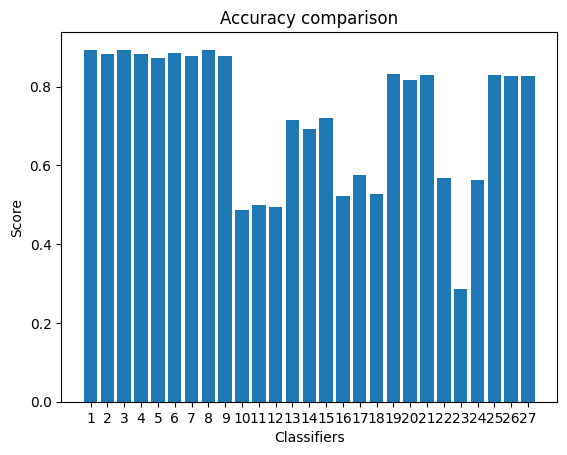

In [37]:
accuracy_scores = []
f1_scores = []

for model, x, y in zip(models, full_x_test, full_y_test):
  y_pred = model.predict(x)
  accuracy = accuracy_score(y, y_pred)
  f1 = f1_score(y, y_pred, average="weighted")

  accuracy_scores.append(accuracy)
  f1_scores.append(f1)

x = np.arange(len(models)) + 1

plt.bar(x, accuracy_scores)

plt.xlabel('Classifiers')
plt.xticks(x)
plt.ylabel('Score')
plt.title('Accuracy comparison')

plt.savefig("drive/MyDrive/Colab_Projects/RITAL/plots/accuracy_simple.png")
plt.show()

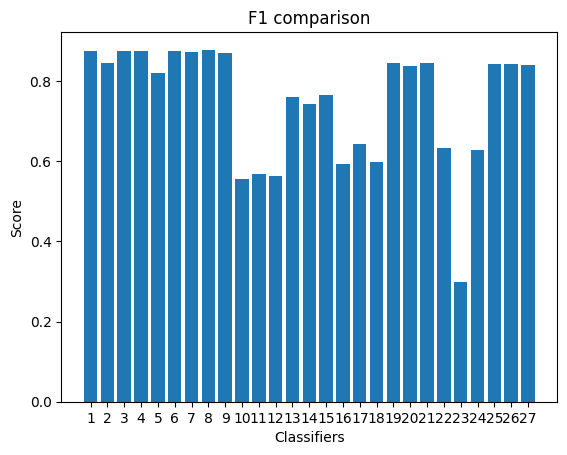

In [38]:
x = np.arange(len(models)) + 1

plt.bar(x, f1_scores)

plt.xlabel('Classifiers')
plt.xticks(x)
plt.ylabel('Score')
plt.title('F1 comparison')

plt.savefig("drive/MyDrive/Colab_Projects/RITAL/plots/f1_simple.png")
plt.show()

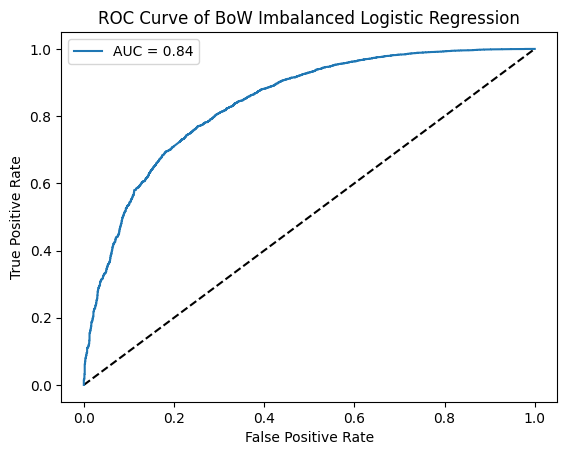

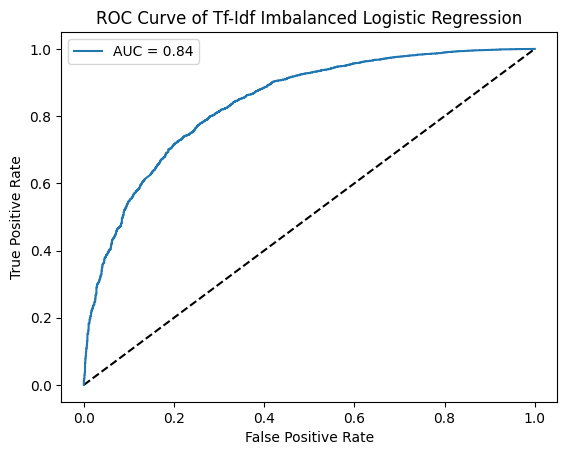

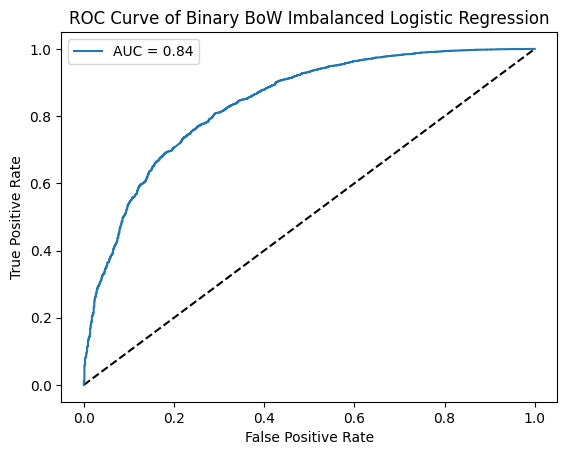

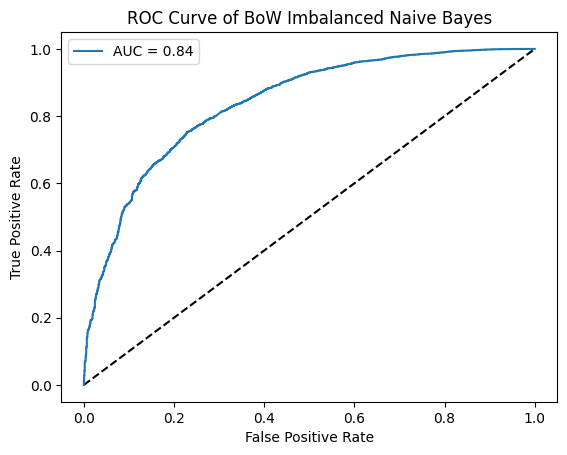

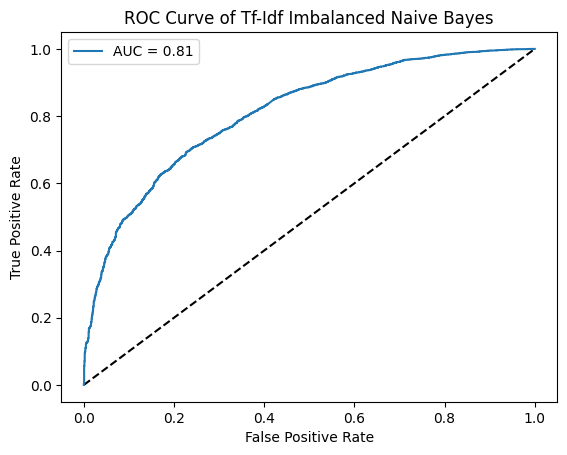

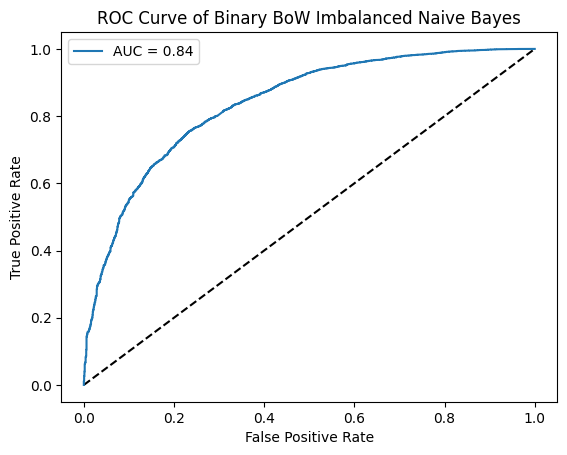

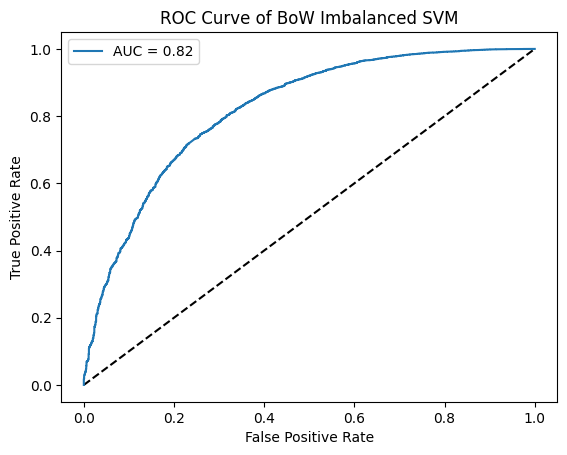

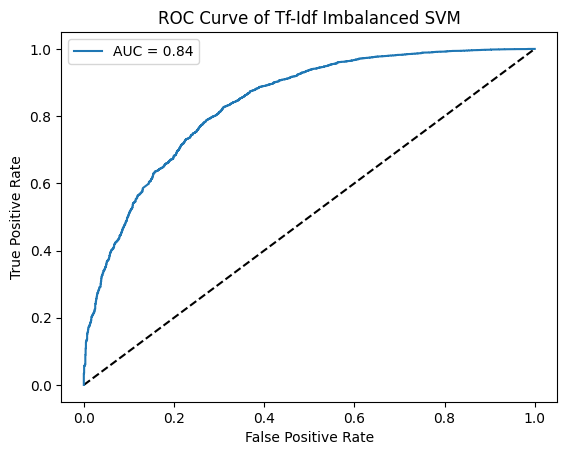

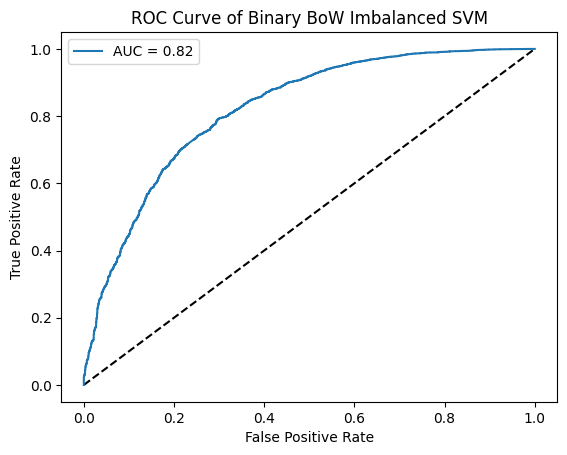

In [39]:
full_x_train = [bow_x_train, tfidf_x_train, presence_x_train,
           bow_x_train, tfidf_x_train, presence_x_train,
           bow_x_train, tfidf_x_train, presence_x_train]

full_y_train = [y_train, y_train, y_train,
                y_train, y_train, y_train,
                y_train, y_train, y_train]

# let's plot the ROC curves and calculate the AUC for the first 9 models (BOW)
# since they seem to be the best performing

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

for model, x, y, x_t, y_t, name in zip(models[:9], full_x_test[:9], full_y_test[:9], full_x_train, full_y_train, model_names[:9]):
  if "SVM" in name:
    c_model = CalibratedClassifierCV(model, method='sigmoid')
    c_model.fit(x_t, y_t)

  else:
    c_model = model

  y_pred = c_model.predict_proba(x)[:,1]

  fpr, tpr, thresholds = roc_curve(y, y_pred)
  auc = roc_auc_score(y, y_pred)

  plt.figure()
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve of {name}')
  plt.legend()
  plt.savefig(f"drive/MyDrive/Colab_Projects/RITAL/plots/roc_curve_{name}_0.png")
  plt.show()

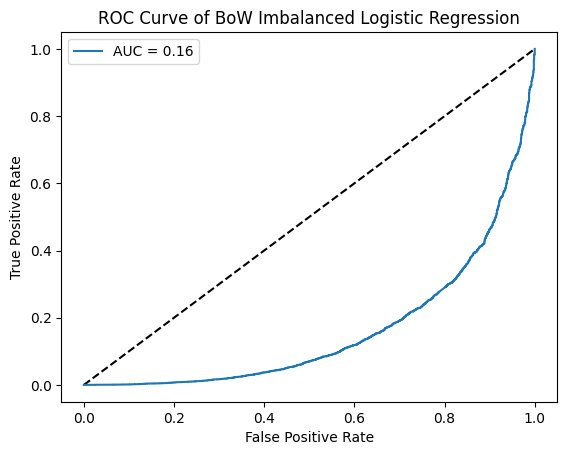

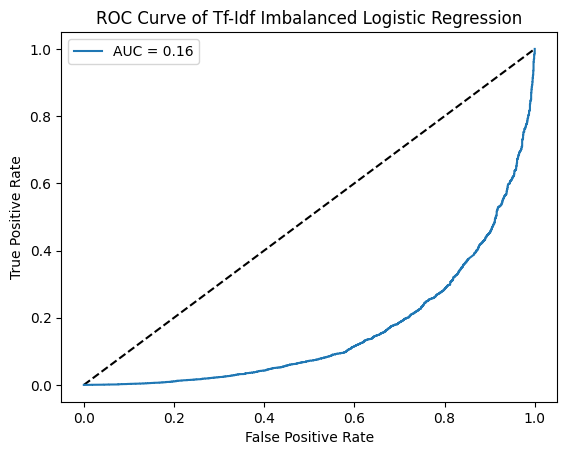

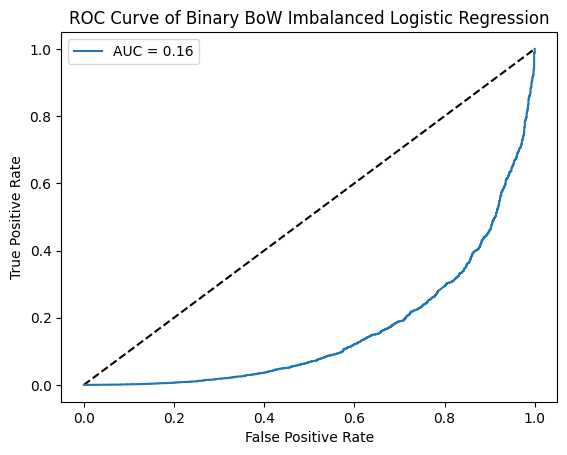

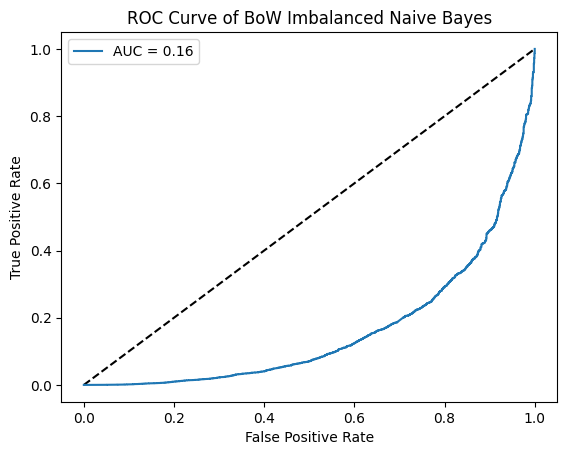

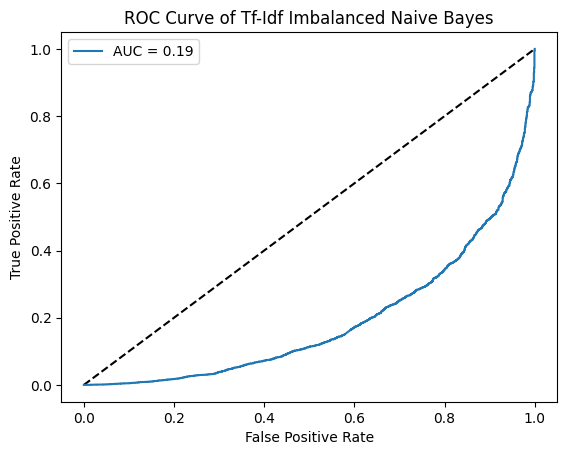

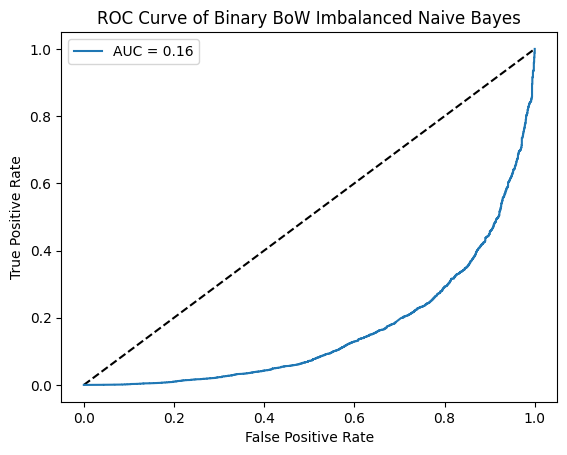

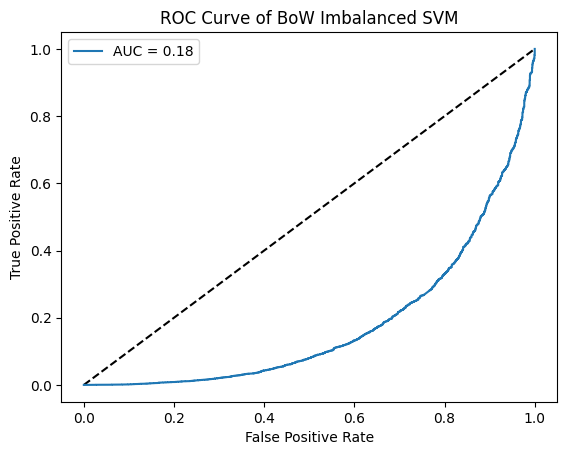

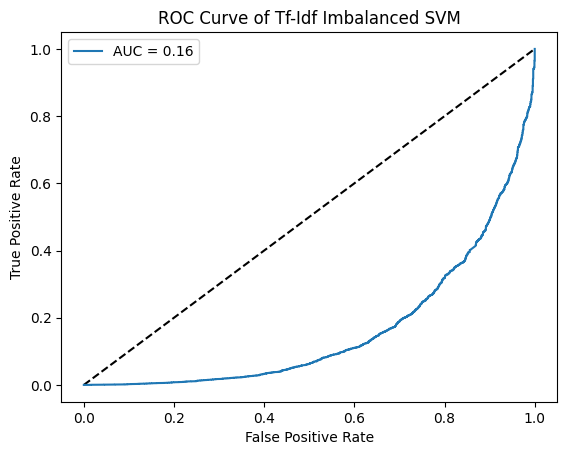

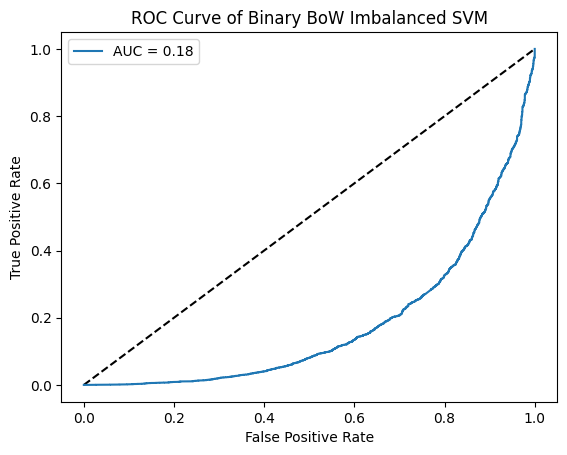

In [40]:
for model, x, y, x_t, y_t, name in zip(models[:9], full_x_test[:9], full_y_test[:9], full_x_train, full_y_train, model_names[:9]):
  if "SVM" in name:
    c_model = CalibratedClassifierCV(model, method='sigmoid')
    c_model.fit(x_t, y_t)

  else:
    c_model = model

  y_pred = c_model.predict_proba(x)[:,0]

  fpr, tpr, thresholds = roc_curve(y, y_pred)
  auc = roc_auc_score(y, y_pred)

  plt.figure()
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve of {name}')
  plt.legend()
  plt.savefig(f"drive/MyDrive/Colab_Projects/RITAL/plots/roc_curve_{name}.png")
  plt.show()

## 6. Training best-performing models on whole dataset and running them on the true testing set